In [1]:
#!python3 -m venv venv
#!source venv/bin/activate
#!pip install numpy pandas matplotlib seaborn nbformat ffmpeg 

In [33]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import pylab
import seaborn as sns

In [2]:
SEA_training_data = pd.read_csv("artificial/sea/SEA_training_data.csv", names=["x", "y", "z"], header=None)
SEA_training_class = pd.read_csv("artificial/sea/SEA_training_class.csv", names=["class"], header=None)
sea = SEA_training_data
sea["class"] = SEA_training_class["class"]

In [ ]:
'''
#!pip install plotly
import plotly.express as px
sea["size"] = [0.1]*len(sea)
fig = px.scatter_3d(sea[0:1000], x="x", y="y", z="z", color="class", size = "size")

fig.show()
'''

In [ ]:
'''
sns.pairplot(sea, hue="class")
'''

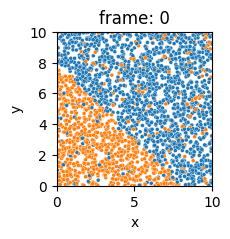

In [37]:
points = 2500
expected_time = 5000
df_len = len(sea)
_frames = 20
_interval = int(expected_time/_frames)
step = int((df_len-points)/_frames)

fig, ax = plt.subplots()
fig.set()
fig.set_figheight(2)
fig.set_figwidth(2)
def animate(i):
    plt.clf()
    plt.title("frame: "+str(i))
    ax = sns.scatterplot(sea[i*step:i*step+points], x="x", y="y", hue="class", s=8.0)
    ax.set(xlim=(0, 10), ylim=(0, 10))
    ax.legend([],[], frameon=False)

ani = animation.FuncAnimation(fig, animate, frames=_frames,interval=_interval,repeat=True)

writer = animation.PillowWriter(fps=5)
ani.save('images/sea_drift.gif', writer=writer)


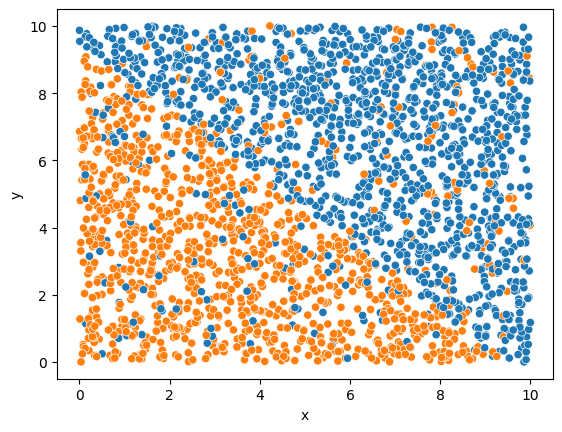

In [7]:
# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Ewerton'),
                                bitrate=1800)
ani.save('scatter.gif', writer=writer)

Animation size has reached 21246544 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


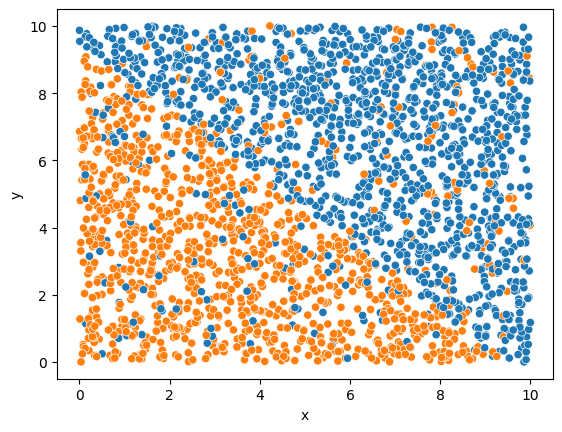

In [8]:
with open("sea_jshtml.html", "w") as f:
    print(ani.to_jshtml(), file=f)

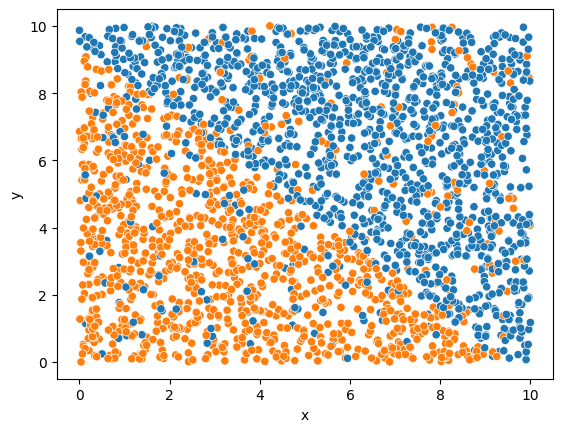

In [10]:

with open("images/sea_drift.html", "w") as f:
    print(ani.to_html5_video(), file=f)